# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Genesis Adam \
_Student No._: 2019-05415 \
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 18/02/2024 - 4:50 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** GENESIS ADAM D. MENDOZA

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

#### Solution

Initiate a seed so that the noise throughout the code is consistent. Define the starting point, the stopping point, and the number of points. From this, initiate an array of $x$ values. From these $x$ values, generate an array that takes each of the point in the $x$ array and maps them into a corresponding $y$ value. Add a random number from the normal distribution with mean $0$ and variance $0.1$.

In [2]:
np.random.seed(420) 

start = 0
stop = 3
n_points = 100

#Generate 100 points from 0 to 3, including the endpoints
x_points = np.linspace(start, stop, n_points) 
#Generate the noisy data through list comprehension by taking each value in x_points and calculating the corresponding y value.
y_points = [point*np.sin(point) + np.random.normal(0,0.1)  for point in x_points] 

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*

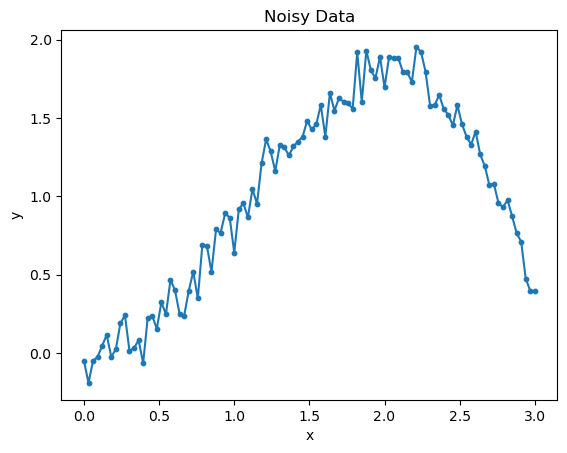

In [3]:
plt.xlabel('x') #set the x-axis label
plt.ylabel('y') #set the y-axis label
plt.title('Noisy Data')
plt.scatter(x_points, y_points, s = 10) #create a scatter plot of the data
plt.plot(x_points, y_points) #impose upon the scatter plot a lineplot
plt.show()

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*


In [4]:
from sklearn.model_selection import train_test_split

#Split the whole data into 2 in order to get a 50% part for the training set and another 50% for the collective test and cross-validation set
x_train, x_split, y_train, y_split = train_test_split(x_points, y_points, train_size = 0.5, random_state = 0)
#Separate the test and cross-validation set to get 25% each
x_test, x_cv, y_test, y_cv = train_test_split(x_split, y_split, test_size = 0.5, random_state = 0)

2. Get the best-fit curve for polynomial degrees $d=0$ to $14$ for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*

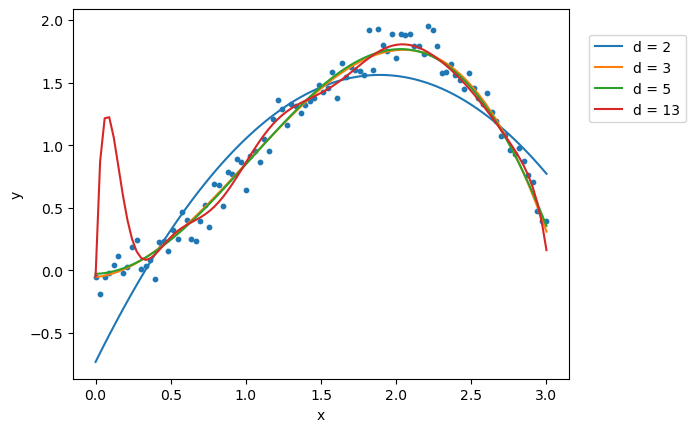

In [5]:
for n in [2,3,5,13]: #to iterate from d = 0 to d = 14
    fit = np.polyfit(x_train, y_train, deg = n) #fit an n-degree polynomial with the training set and get the coefficients array in decreasing order
    x_train_fit = np.poly1d(fit) #transform the 'fit' array into a polynomial
    plt.plot(x_points, x_train_fit(x_points), label = 'd = '+str(n)) #plot the curve by inputting x_points into the x_train_fit polynomial.

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_points, y_points, s=10) #impose the scatter plot for reference
plt.legend(bbox_to_anchor=(1.25, 0.95), ncol=1)
plt.show()

3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*

Define the excluded end part of the list of polynomial degrees. Initiate the degree list for the purpose of plotting. Then, initiate empty arrays for the root-mean-square values of the cross-validation, training, and test set. Make a loop that iterates through each polynomial degree and calculates the root-mean-square error of the fitted values and its corresponding true values.

In [6]:
from sklearn.metrics import mean_squared_error

n_range = 15
deg = [*range(n_range)]
rms_cross_val = []
rms_train = []
rms_test = []

for n in deg:
    fit = np.polyfit(x_train, y_train, deg = n) 
    x_train_fit = np.poly1d(fit)
    rms_cross_val.append(np.sqrt(mean_squared_error(y_cv, x_train_fit(x_cv))))
    rms_train.append(np.sqrt(mean_squared_error(y_train, x_train_fit(x_train))))
    rms_test.append(np.sqrt(mean_squared_error(y_test, x_train_fit(x_test))))

print('root mean square error for the cross validation set:')
print(rms_cross_val)
print('root mean square error for the training data:')
print(rms_train)

root mean square error for the cross validation set:
[0.6771382374392669, 0.49360389356184575, 0.28417902561346386, 0.1091408024168082, 0.11015323110283562, 0.10879358763496984, 0.10958786357990744, 0.10982224428857396, 0.12279098797417733, 0.11733231593551473, 0.11594814962073581, 0.12341279202819605, 0.3013349072274355, 0.40247372016742355, 1.3578492223459866]
root mean square error for the training data:
[0.5687217360782665, 0.46054855602105366, 0.21341057462111343, 0.08233985339816577, 0.08149337162337107, 0.08130982113778384, 0.08126535958668334, 0.08098704877227812, 0.07715482324677687, 0.07526728642453678, 0.0750805871509365, 0.07421376960790205, 0.07123876018547592, 0.07092111261579276, 0.06460744383941434]


4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*

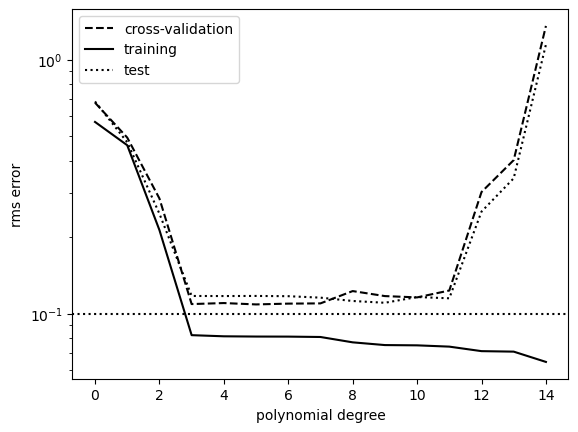

In [7]:
plt.xlabel('polynomial degree')
plt.ylabel('rms error')
plt.yscale('log')
plt.plot(deg, rms_cross_val, 'k--', label = 'cross-validation')
plt.plot(deg, rms_train, 'k', label = 'training') 
plt.plot(deg, rms_test, 'k:', label = 'test')
plt.axhline(y = 0.1, color = 'k', linestyle = ':') 
plt.legend(loc = 'upper left')
plt.show()

As we can see, the rms error of the training data and the polynomial fitted to it decreases as the degree increases. Increasing the polynomial degree allows the curve-fitting to be more flexible so it has more freedom with minimizing the error. This will be problematic at some point since the increased flexibility allows the noise to also be fitted. We call this situation **overfitting**. This is apparent in the plot above where we have imposed the root-mean-squared error of the never-before-seen data, the validation and the test set, with the trained polynomial fit. The overfitting regime is at the right side of the minima of the error curve where the error increases again. 

### Housing Dataset

Suppose we want to buy a house from a neighbourhood, and we have data that contains the general characteristic of the neighborhood, houses, and the population itself. To temper our expectations, we want to predict the median house value.

In [8]:
import pandas as pd

file_path = 'Datasets\\'
housing = pd.read_csv(file_path + 'housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We want to predict the `median_house_value` column. What we want to do is to separate the column we want to predict, or the target column, from the possible determinants that we will use for the prediction, or the feature columns. Then, we split the data into the training set and the test set.

In [10]:
from sklearn.model_selection import train_test_split

target_cols = ['median_house_value']
feature_cols = [col for col in housing.columns if col not in target_cols]

x_full = housing[feature_cols]
y = housing[target_cols]

x_train, x_test, y_train, y_test = train_test_split(x_full, y, train_size = 0.8, random_state = 0)

It is important to check if there are blank cells and the feature column where it is included so we can deal with it in the future. 

In [11]:
null_cols = [col for col in x_full.columns if x_full[col].isnull().any()]
null_cols

['total_bedrooms']

Check the amount of rows where there are no entries.

In [12]:
nan_count = x_full[null_cols].isnull().sum().sum()
print('There are {} rows with NaN values'.format(nan_count))

There are 207 rows with NaN values


We will list the numerical and categorical columns.

In [13]:
num_cols = [col for col in feature_cols if x_full[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in feature_cols if x_full[col].dtype in ['object']]

print('The numerical columns are: {}'.format(num_cols))
print('The categorical columns are: {}'.format(categorical_cols))

The numerical columns are: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
The categorical columns are: ['ocean_proximity']


As we can see, the column with a null cell is numerical. We can preprocess the data by filling the null cell with the mean value. It is better than simply putting in 0 total bedrooms for a community.

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = SimpleImputer(strategy = 'mean')
cat_transformer = OneHotEncoder(handle_unknown = 'ignore')
preprocess = ColumnTransformer(transformers = [('num', num_transformer, num_cols), ('cat', cat_transformer, categorical_cols)])

Next, we will use a Random Forest Regressor with a max depth of 30.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

max_depth_val = 30
model = RandomForestRegressor(max_depth = max_depth_val, random_state = 0)
pipeline = Pipeline(steps = [('preprocessor', preprocess), ('model', model)])
pipeline.fit(x_train, y_train.values.ravel())
predicted_val = pipeline.predict(x_test)
error = mean_squared_error(y_test, predicted_val)
print('The root-mean-square error for a maximum depth of {} is {}.'.format(max_depth_val, np.sqrt(error)))

The root-mean-square error for a maximum depth of 30 is 48165.49218196788.


For comparison, we can check the actual and predicted values side-by-side.

In [16]:
predicted_cols = pd.DataFrame(predicted_val, columns = {'predicted'}, index = y_test.index)
comparison_table = y_test.join(predicted_cols)
comparison_table.head()

,median_house_value,predicted
14740,136900.0,143553.00
10101,241300.0,244355.00
20566,200700.0,139042.00
2670,72500.0,77190.00
15709,460000.0,356695.23


We can actually search for parameters that will make this error lower. For example, we can make loops that calculate the error for a corresponding parameter and find the parameter value that minimizes this error. If we will do this for all parameters, it may be computationally expensive. I want to try hyperparameter tuning as described in [this article](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) but as we can see, the calculation for a maximum depth of 30 takes $>10$ secs. This may consume a lot of time so we will stop here for now.